In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('CICIDS2017_sample.csv')

df

df.Label.value_counts()





BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

In [40]:
#df_BENIGN = df[(df['Label']=='BENIGN')]
#df_BENIGN = df_BENIGN.sample(n=None,frac=0.01,replace=False, weights=None, random_state=None, axis=0)

#df_DoS = df_DoS.sample(n=None,frac=0.05,replace=False, weights=None, random_state=None, axis=0)
#df_s = df_BENIGN
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')]
df_DoS = df[(df['Label']=='DoS')]
df_PortScan = df[(df['Label']=='PortScan')]
df_BruteForce = df[(df['Label']=='BruteForce')]
df_poison = pd.concat([df_DoS,df_PortScan,df_BruteForce,df_minor])
#df_s = df_s.sort_index()
df_poison=df_poison.sort_index()
#df_s.to_csv('CICIDS2017_sample2.csv',index=0)
df_poison.to_csv('poison_data.csv',index=0)
df=pd.read_csv('poison_data.csv')
#df = pd.read_csv('CICIDS2017_sample2.csv')
df.Label.value_counts()


DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

In [41]:
#Max-min Scalar
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
df = df.fillna(0)


In [42]:
#split train set and test set
from sklearn.calibration import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values 
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.9,test_size=0.1, random_state = 200,stratify = y)

#X_train.shape
pd.Series(y_train).value_counts()

2    17132
4     7151
1     2490
5     1962
0     1769
3       33
dtype: int64

In [43]:

from sklearn.decomposition import PCA
pca = PCA(n_components=20)
 
principalComponents = pca.fit_transform(X_train)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])

In [46]:
targetDataframe = df[['Label']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.to_csv('pca_components_poison.csv')





# Save the DataFrame to a CSV file
#pca_components_df.to_csv('pca_components.csv', index=True)


In [47]:
print(sum(pca.explained_variance_ratio_))

0.9969990240326307


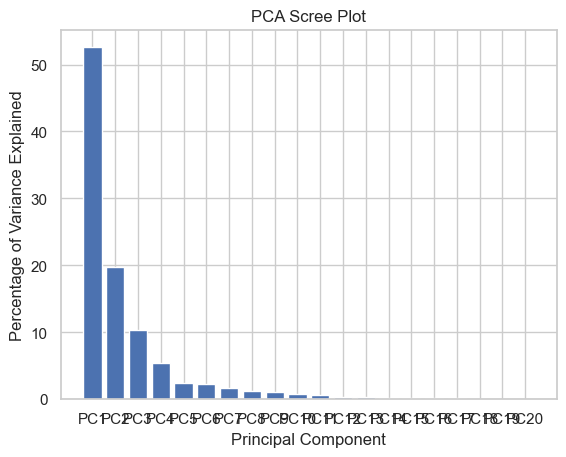

In [48]:
import numpy as np
import matplotlib.pyplot as plt

percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)

columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
           'PC11', 'PC12', 'PC13', 'PC14', 'PC15','PC16', 'PC17','PC18','PC19','PC20']

assert len(percent_variance) == len(columns)

# Plotting the scree plot
plt.bar(x=range(1, len(columns) + 1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()


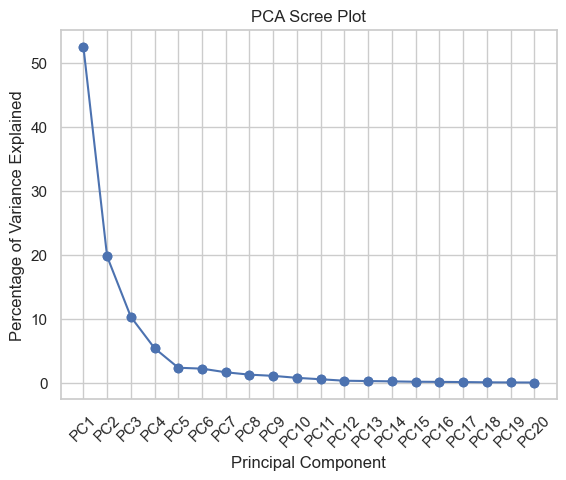

In [49]:
import numpy as np
import matplotlib.pyplot as plt

percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)

columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
           'PC11', 'PC12', 'PC13', 'PC14', 'PC15','PC16', 'PC17', 'PC18','PC19','PC20']

assert len(percent_variance) == len(columns)

x_coords = np.arange(1, len(columns) + 1)

plt.scatter(x_coords, percent_variance)
plt.plot(x_coords, percent_variance, '-o')  
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.xticks(x_coords, columns, rotation=45)  
plt.show()


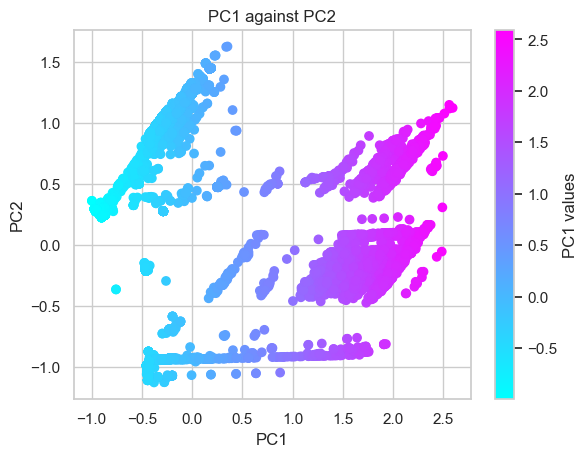

In [50]:
color_map = plt.cm.get_cmap('cool')  

plt.scatter(principalDataframe.PC1, principalDataframe.PC2, c=principalDataframe.PC1, cmap=color_map)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='PC1 values')  

plt.show()

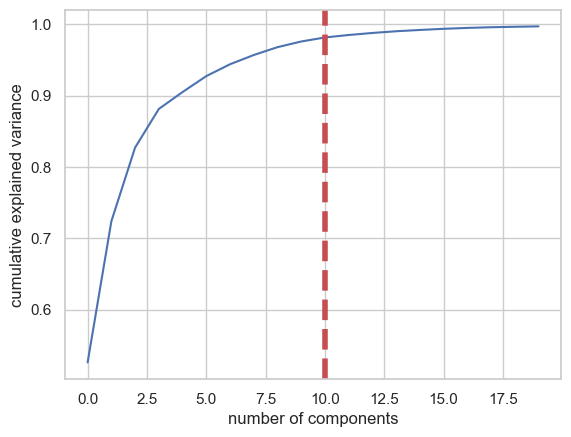

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.525976,0.525976
1,0.723735,0.197758
2,0.827065,0.103330
3,0.881219,0.054154
4,0.904948,0.023729
5,0.927267,0.022319
6,0.943908,0.016641
7,0.956833,0.012925
8,0.967839,0.011006
9,0.975788,0.007949


In [51]:

pca_test = PCA(n_components=20)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [52]:
from sklearn.decomposition import PCA
feature_names = df.columns  
loadings = pca.components_
for i, component in enumerate(loadings):
    used_features = [feature_names[j] for j, weight in enumerate(component)]
    print(f"Component {i+1} uses the following features: {used_features}")


Component 1 uses the following features: ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Co

In [53]:
print('Top 10 most important features in each component')
print('===============================================')
for row in range(pca.components_.shape[0]):
    temp = np.argpartition(-(pca.components_[row]), 10)
 
    indices = temp[np.argsort((-pca.components_[row])[temp])][:10]
    
  
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 10 most important features in each component
Component 0: ['Idle Max', 'Fwd IAT Max', 'Flow IAT Max', 'Fwd IAT Total', 'Flow Duration', 'Idle Mean', 'Idle Min', 'Bwd Packet Length Max', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean']
Component 1: ['PSH Flag Count', 'Average Packet Size', 'Packet Length Mean', 'Bwd Packet Length Max', 'Avg Bwd Segment Size', 'Bwd Packet Length Mean', 'Packet Length Std', 'Bwd Packet Length Std', 'Init_Win_bytes_forward', 'Down/Up Ratio']
Component 2: ['FIN Flag Count', 'Bwd IAT Total', 'Bwd IAT Max', 'Bwd IAT Std', 'Idle Min', 'Fwd IAT Total', 'Flow Duration', 'Idle Mean', 'Fwd IAT Max', 'Flow IAT Max']
Component 3: ['PSH Flag Count', 'min_seg_size_forward', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Flow Duration', 'Fwd IAT Total', 'Fwd IAT Max', 'Flow IAT Max', 'Idle Max', 'Idle Mean']
Component 4: ['SYN Flag Count', 'Fwd PSH Flags', 'min_seg_size_forward', 'Init_Win_bytes_backward', 'Init_Win_bytes_forward', 'Bwd IAT Total', 'Bwd IAT